In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/imdb_top_1000.csv')

In [3]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [19]:
df.describe(include='all')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,831,831,831,831,831,831.000000,831.000000,831,831,831,831,831,8.310000e+02,831
unique,831,95,14,133,182,NaN,NaN,472,556,704,737,782,NaN,823
top,The Shawshank Redemption,2014,U,101 min,Drama,NaN,NaN,Steven Spielberg,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,1,31,200,21,75,NaN,NaN,13,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,7.946931,77.460000,NaN,NaN,NaN,NaN,NaN,3.152499e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,0.283204,11.868674,NaN,NaN,NaN,NaN,NaN,3.436443e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,7.600000,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,7.700000,71.000000,NaN,NaN,NaN,NaN,NaN,7.143000e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,7.900000,77.460000,NaN,NaN,NaN,NaN,NaN,1.867340e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.100000,85.500000,NaN,NaN,NaN,NaN,NaN,4.457210e+05,NaN


Currently, I intend to eliminate any `Poster_Link`, `Overview` that I deem unimportant during the analysis process. 

In [4]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [5]:
df.drop(columns=['Poster_Link', 'Overview'],inplace=True)

# Handle Missing values

In [6]:
def get_missing_stats(df):
    """function take dataFrame and compute the number of missing value in eache feature
        and compute the percentage of missing.
    Args:
        df ([DataFrame]): [DataFrame we want to compute the missing values]

    Returns:
        [DataFrame]: [dataFrame containing four columns [feature_name,  missing_count, missing_percentage]]
    """
    missing_df = df.isna().sum().sort_values(ascending=False).rename('missing_count').reset_index().rename(columns={'index':'feature_name'})
    missing_df['missing_percentage'] = missing_df['missing_count']/df.shape[0]*100
    
    
    return missing_df
 

In [7]:
missing_data = get_missing_stats(df)
missing_data

,feature_name,missing_count,missing_percentage
0,Gross,169,16.9
1,Meta_score,157,15.7
2,Certificate,101,10.1
3,Series_Title,0,0.0
4,Released_Year,0,0.0
5,Runtime,0,0.0
6,Genre,0,0.0
7,IMDB_Rating,0,0.0
8,Director,0,0.0
9,Star1,0,0.0


we have a total missing value of 42.7% in three columns Gross, Meta_score, and Certificate

I will drop any Movie that hasn't Gross	

In [8]:
del_index = df[df['Gross'].isna()].index
df.drop(del_index, inplace=True)

In [9]:
get_missing_stats(df)

,feature_name,missing_count,missing_percentage
0,Meta_score,81,9.747292
1,Certificate,46,5.535499
2,Series_Title,0,0.000000
3,Released_Year,0,0.000000
4,Runtime,0,0.000000
5,Genre,0,0.000000
6,IMDB_Rating,0,0.000000
7,Director,0,0.000000
8,Star1,0,0.000000
9,Star2,0,0.000000


i will fill the missing values in the `Certificate` column with an N_C value indicate to **No Certificate** <br>
and for the Meta_score column i will fill with mean 

In [10]:
df['Certificate']= df['Certificate'].fillna('N_C')
df['Meta_score']= df['Meta_score'].fillna(df['Meta_score'].mean())

In [11]:
get_missing_stats(df)

,feature_name,missing_count,missing_percentage
0,Series_Title,0,0.0
1,Released_Year,0,0.0
2,Certificate,0,0.0
3,Runtime,0,0.0
4,Genre,0,0.0
5,IMDB_Rating,0,0.0
6,Meta_score,0,0.0
7,Director,0,0.0
8,Star1,0,0.0
9,Star2,0,0.0


# EDA

### Most Popular Genre

In [12]:
# genre with the number of movies that contain it
genres_count = df['Genre'].str.split(',', expand=True).stack().str.strip().value_counts()

In [13]:
# Create a new dataframe containing the count of movies/TV shows in each genre 
genres_count_df = genres_count.reset_index().rename(columns={'index':'Genre', 0:'Count'})
genres_count_df

,Genre,Count
0,Drama,597
1,Comedy,191
2,Crime,171
3,Adventure,170
4,Action,156
5,Thriller,110
6,Romance,107
7,Biography,96
8,Mystery,84
9,Animation,67


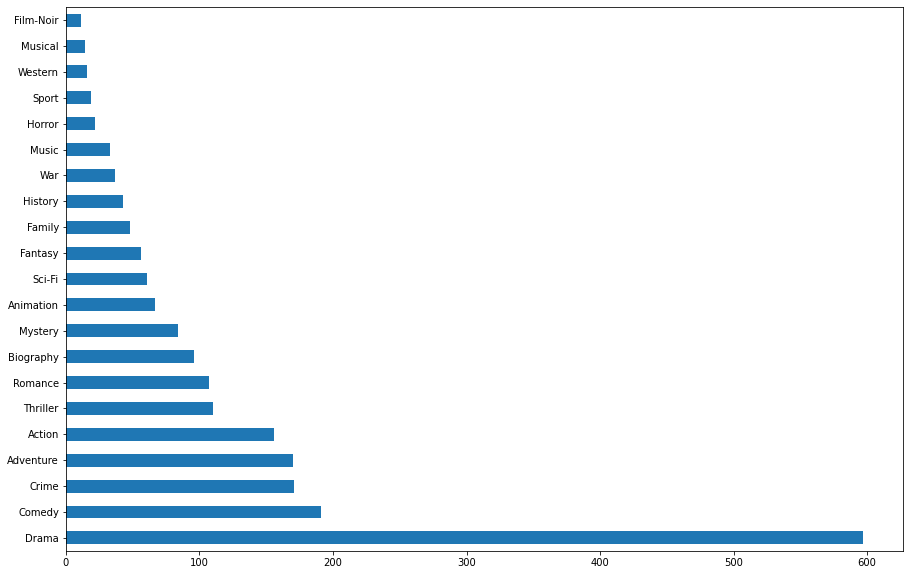

In [14]:
# plot the genre count into a bar horizontal chart with matplotlib
genres_count.plot.barh(figsize=(15, 10))
plt.show()

it seems like a drama it's most popular Genre of movies and TV shows

### Director with the most top-rated movies/TV shows

In [15]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
991,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
994,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


In [16]:
# filter the movies/TV shows in df by top-IMDB-Rating	
# i will consder that the 8.5 and higher IMDB Rating is the top-rated movies/TV shows
top_rated_df = df[df['IMDB_Rating'] >= 8.5]

# Count the movies/TV shows directed by each director
director_counts = top_rated_df['Director'].value_counts()
director_counts_df = director_counts.reset_index().rename(columns={'index':'Director_Name', 'Director':'Movies_Counts'})
director_counts_df

,Director_Name,Movies_Counts
0,Christopher Nolan,4
1,Peter Jackson,3
2,Frank Darabont,2
3,Robert Zemeckis,2
4,Francis Ford Coppola,2
5,Martin Scorsese,2
6,Sergio Leone,2
7,Charles Chaplin,2
8,David Fincher,2
9,Steven Spielberg,2


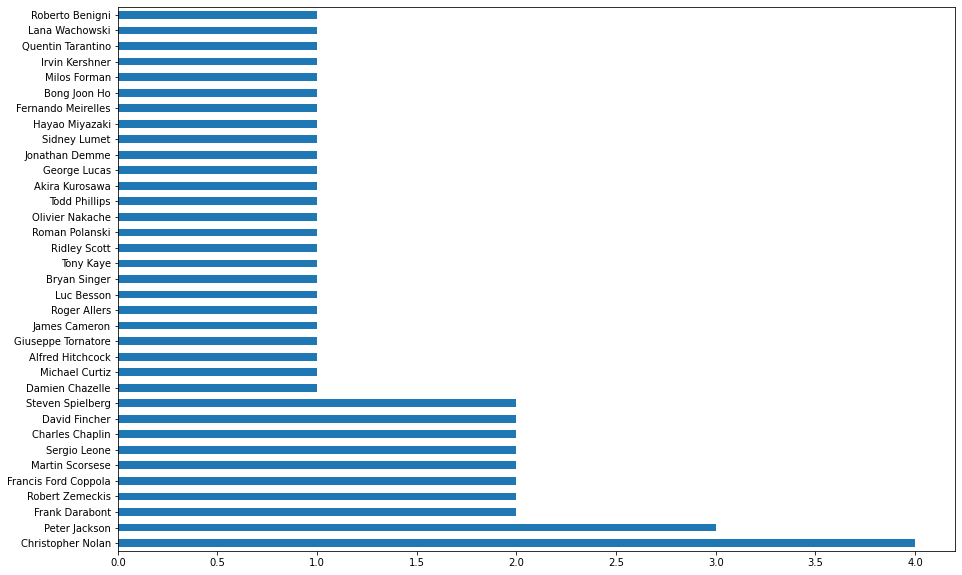

In [17]:
# plot the director count into a bar horizontal chart with matplotlib
director_counts.plot.barh(figsize=(15, 10))
plt.show()

Christopher Nolan is the Director that has most movies/TV shows in the top IMDB Rating	

---

# Summarizing 

- the dataset has 1000 rows (movie/TV show) and 16 feature
 
- drop the poster link and overview columns of each movie TV show because I think it's not important for analyzing
 
- most feature in the desert has an object data type
 
- we have a total missing value of 42.7% in three columns Gross, Meta_score, and Certificate
 
- drop any Movie that hasn't Gross	
 
- fill the missing values in the `Certificate` column with an N_C value indicate to **No Certificate**
- and for the Meta_score column i will fill in with mean
 
- drama it's most popular Genre of movies and TV shows 
 
- Christopher Nolan is the Director that has the most movies/TV shows in the top IMDB Rating with 4 shows

### The End